In [1]:
cd ..

F:\Programming\Competitions\aaa Dacon - HAICon2021


In [2]:
from Models import get_baseline_tuner, get_ViT_tuner

from Steps import search_and_train, get_threshold, test_and_save

In [3]:
class temp:
    sequence_length = 50
    sequence_stride = 3
    batch_size = 32
    model_name = 'transformer'
args = temp()

In [4]:
model, selected_cols, scaler = search_and_train(args, get_ViT_tuner, timelen=args.sequence_length)

INFO:tensorflow:Reloading Oracle from existing project search_saved/transformer\oracle.json
INFO:tensorflow:Reloading Tuner from search_saved/transformer\tuner0.json
INFO:tensorflow:Oracle triggered exit
Results summary
Results in search_saved/transformer
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
n_encoders: 4
n_heads: 16
att_dropout: 0.2
fwd_num: 4
fwd_dropout: 0.4
optimizer: Adam
lr: 0.0001
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: b76b38399bcbcccb3b7be3bb28ae244b
Score: 0.030432166531682014
Trial summary
Hyperparameters:
n_encoders: 4
n_heads: 8
att_dropout: 0.2
fwd_num: 4
fwd_dropout: 0.2
optimizer: Adam
lr: 0.0001
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: e1ff95b705f29c87e0d37a3ddc60fe55
Score: 0.030631719157099724
Trial summary
Hyperparameters:
n_encoders: 3
n_heads: 16
att_dropout: 0.2
fwd_num: 4
fwd_dropout: 0.2
optimizer: Adam


In [5]:
from DatasetModules import load_dataset, HAIDataLoader
from settings import VALIDATION_FOLDER

np_validation_list, attack = load_dataset(VALIDATION_FOLDER,
                                          selected_cols=selected_cols,
                                          scaler=scaler,
                                          ewm=False,
                                          validation=True)
validation_dataset = HAIDataLoader(np_validation_list,
                                   length=args.sequence_length,
                                   stride=1,
                                   batch_size=args.batch_size,
                                   train=False)

In [37]:
validation_dataset[0][0][0].shape

(32, 50, 68)

In [16]:
import pandas as pd
tt = pd.DataFrame(attack)
tt.describe()

,0
count,86400.000000
mean,0.010243
std,0.100689
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [19]:
import numpy as np
(unique, counts) = np.unique(attack, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 85515]
 [    1   885]]


In [6]:
from Steps.Helpers import test_and_get_list
validation_result = test_and_get_list(model, validation_dataset, np_validation_list, args.sequence_length)

In [39]:
# dataset, raw_dataset = validation_dataset[0], np_validation_list[0]
# res = np.zeros(50, dtype='float32')
# predicted = model.predict(dataset)

In [41]:
# predicted.shape, raw_dataset.shape

((86350, 68), (86400, 68))

In [49]:
# temp = np.mean(np.square(predicted - raw_dataset[50:]), axis=-1).astype('float32')
# temp.shape

(86350,)

In [50]:
# np.mean(temp)

0.05276889

In [7]:
import matplotlib.pyplot as plt

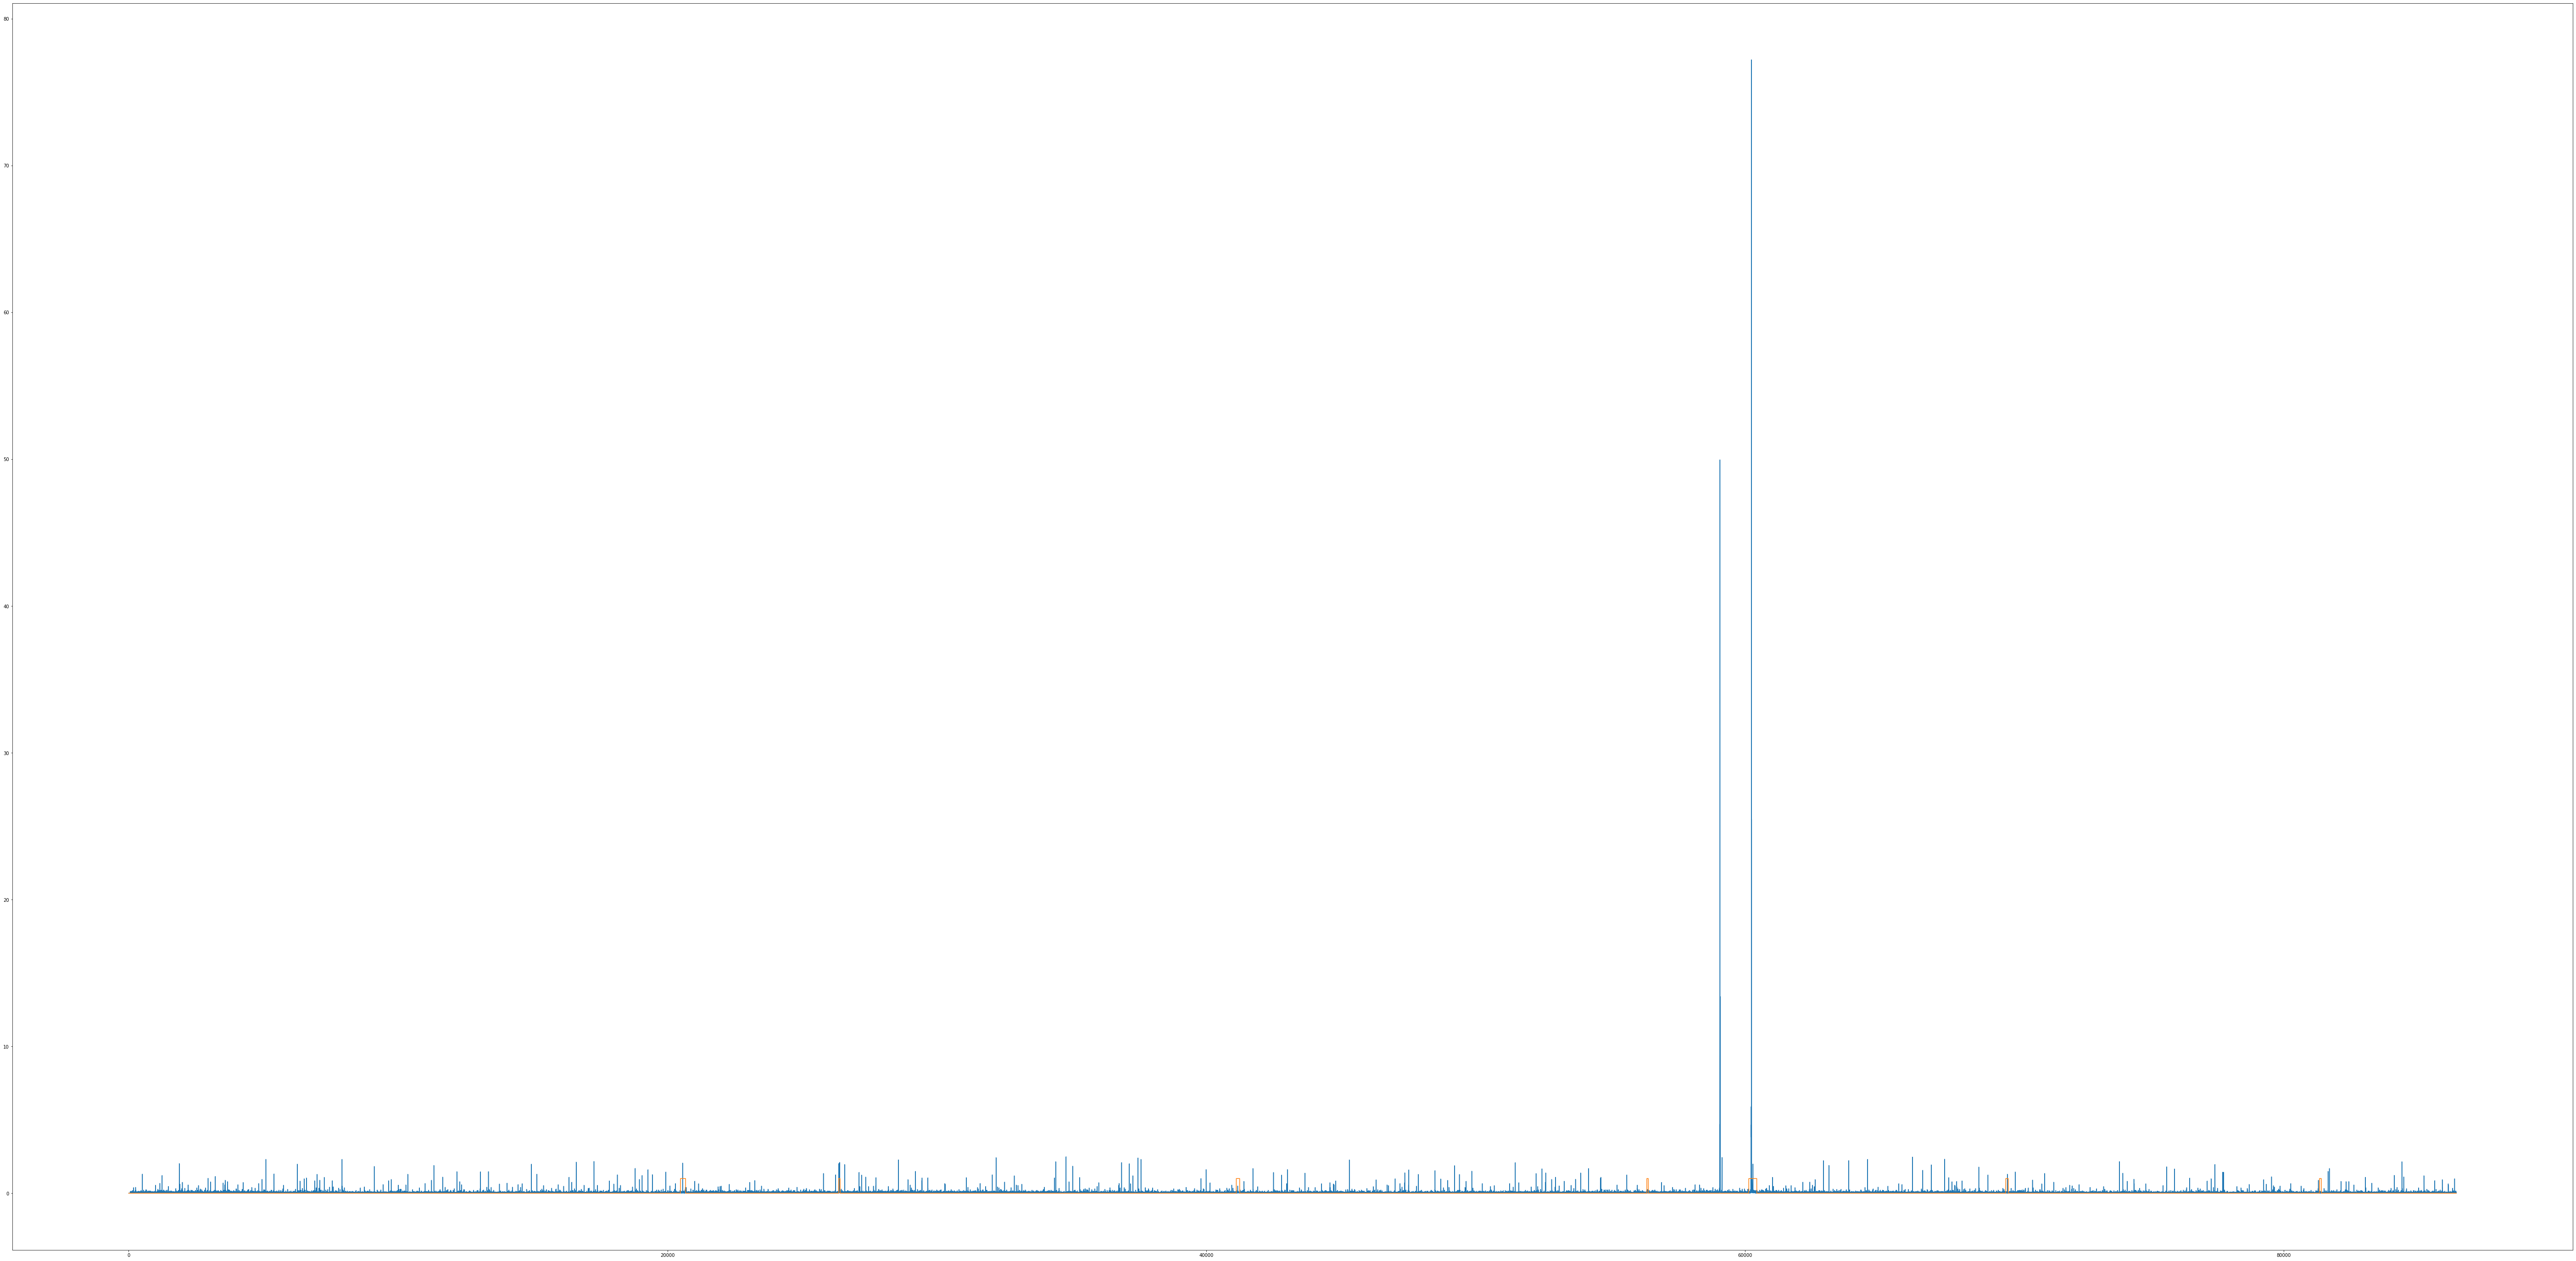

In [20]:
plt.figure(figsize=(100,50))
plt.plot(validation_result)
plt.plot(attack)

In [30]:
from TaPR_pkg import etapr
from Steps.Helpers import *

final = put_labels(validation_result, 2.5)
TaPR = etapr.evaluate_haicon(anomalies=attack, predictions=final)
print(f"F1: {TaPR['f1']:.3f} (TaP: {TaPR['TaP']:.3f}, TaR: {TaPR['TaR']:.3f})")
print(f"# of detected anomalies: {len(TaPR['Detected_Anomalies'])}")
print(f"Detected anomalies: {TaPR['Detected_Anomalies']}")

F1: 0.000 (TaP: 0.000, TaR: 0.000)
# of detected anomalies: 0
Detected anomalies: []
